In [9]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.utils import img_to_array, array_to_img


(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)


train_images1 = x_train.reshape((60000, 28, 28, 1))
train_images1 = x_train.astype("float32") / 255
test_images1 = x_test.reshape((10000, 28, 28, 1))
test_images1 = x_test.astype("float32") / 255

In [10]:
model = Sequential([
    Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),

    Flatten(),
    Dense(256, activation="relu"),

    Dense(10, activation="softmax")
])


model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

In [11]:
history = model.fit(train_images1, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 25s 33ms/step - loss: 0.4971 - accuracy: 0.8175 - val_loss: 0.3411 - val_accuracy: 0.8737
Epoch 2/5
750/750 [==============================] - 22s 30ms/step - loss: 0.3012 - accuracy: 0.8892 - val_loss: 0.2933 - val_accuracy: 0.8935
Epoch 3/5
750/750 [==============================] - 23s 30ms/step - loss: 0.2550 - accuracy: 0.9068 - val_loss: 0.2684 - val_accuracy: 0.9008
Epoch 4/5
750/750 [==============================] - 22s 30ms/step - loss: 0.2239 - accuracy: 0.9189 - val_loss: 0.2615 - val_accuracy: 0.9075
Epoch 5/5
750/750 [==============================] - 23s 30ms/step - loss: 0.1996 - accuracy: 0.9273 - val_loss: 0.2494 - val_accuracy: 0.9101


In [12]:
_, accuracy = model.evaluate(test_images1, test_labels)
print("Test accuracy:", accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.2707 - accuracy: 0.9043
Test accuracy: 0.9042999744415283


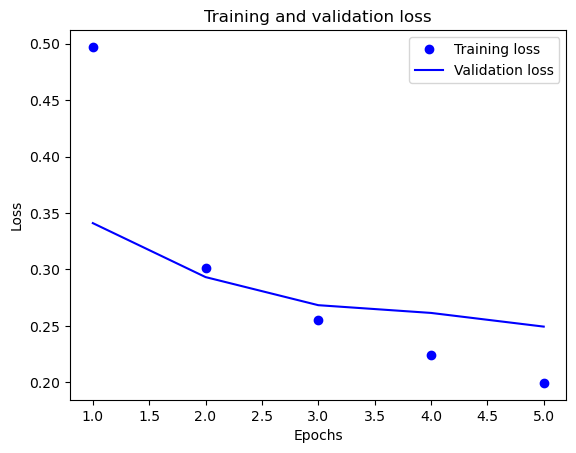

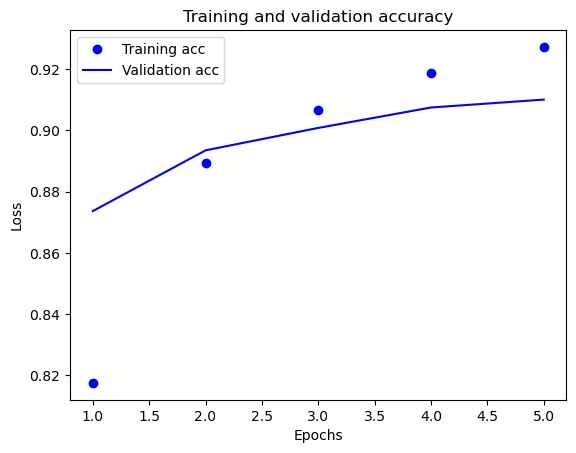

In [13]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Частина 2

In [14]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
conv_base.trainable = False

model_fe = Sequential([
   conv_base,
   Flatten(),
   Dense(64, activation="relu"),
   Dense(10, activation="softmax"),
])

model_fe.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

model_fe.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [15]:
import numpy as np

train_images2 = x_train.reshape((60000, 784))
test_images2 = x_test.reshape((10000, 784))

train_images2=np.dstack([train_images2]*3)
test_images2=np.dstack([test_images2]*3)

train_images2 = train_images2.reshape(-1, 28,28,3)
test_images2= test_images2.reshape (-1,28,28,3)

train_images2 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_images2])
test_images2 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_images2])


train_images2 = train_images2.astype('float32') / 255
test_images2 = test_images2.astype('float32') / 255

In [16]:
history_fe = model_fe.fit(train_images2, train_labels, epochs=10, steps_per_epoch=750, batch_size=64, validation_split=0.2, validation_steps=5, verbose=1)

Epoch 1/10
750/750 [==============================] - 208s 276ms/step - loss: 0.5775 - accuracy: 0.8043 - val_loss: 0.4282 - val_accuracy: 0.8406
Epoch 2/10
750/750 [==============================] - 194s 259ms/step - loss: 0.4113 - accuracy: 0.8510 - val_loss: 0.4016 - val_accuracy: 0.8469
Epoch 3/10
750/750 [==============================] - 193s 257ms/step - loss: 0.3793 - accuracy: 0.8624 - val_loss: 0.3981 - val_accuracy: 0.8469
Epoch 4/10
750/750 [==============================] - 192s 256ms/step - loss: 0.3630 - accuracy: 0.8687 - val_loss: 0.3585 - val_accuracy: 0.8562
Epoch 5/10
750/750 [==============================] - 190s 253ms/step - loss: 0.3482 - accuracy: 0.8737 - val_loss: 0.4029 - val_accuracy: 0.8469
Epoch 6/10
750/750 [==============================] - 197s 263ms/step - loss: 0.3381 - accuracy: 0.8767 - val_loss: 0.3607 - val_accuracy: 0.8625
Epoch 7/10
750/750 [==============================] - 196s 262ms/step - loss: 0.3293 - accuracy: 0.8800 - val_loss: 0.3768 -

In [17]:
_, accuracy = model_fe.evaluate(test_images2, test_labels)
print("Test accuracy:", accuracy)

313/313 [==============================] - 53s 169ms/step - loss: 0.3624 - accuracy: 0.8750
Test accuracy: 0.875


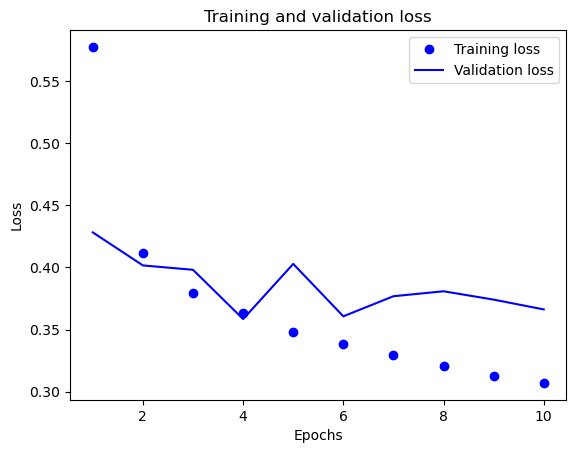

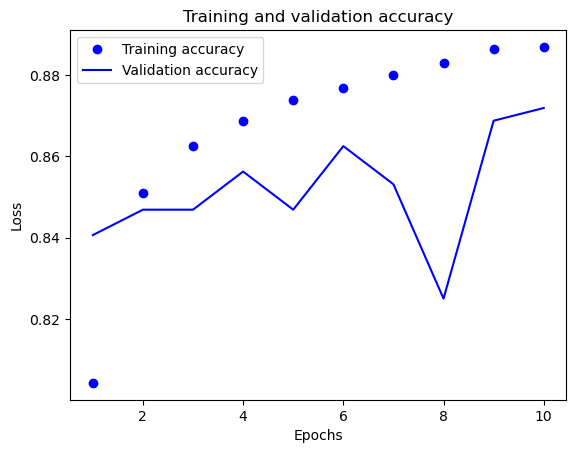

In [18]:
history_dict = history_fe.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [19]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [20]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [23]:
modified_model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])


modified_model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [24]:
history_ft = modified_model.fit(train_images2, train_labels, epochs=10, steps_per_epoch=750, batch_size=64, validation_split=0.2, validation_steps=5, verbose=1)

Epoch 1/10
750/750 [==============================] - 286s 380ms/step - loss: 0.6409 - accuracy: 0.7982 - val_loss: 0.3329 - val_accuracy: 0.8844
Epoch 2/10
750/750 [==============================] - 289s 385ms/step - loss: 0.3230 - accuracy: 0.8917 - val_loss: 0.3008 - val_accuracy: 0.8719
Epoch 3/10
750/750 [==============================] - 286s 381ms/step - loss: 0.2870 - accuracy: 0.9044 - val_loss: 0.3112 - val_accuracy: 0.8750
Epoch 4/10
750/750 [==============================] - 280s 373ms/step - loss: 0.2687 - accuracy: 0.9129 - val_loss: 0.2216 - val_accuracy: 0.9219
Epoch 5/10
750/750 [==============================] - 281s 375ms/step - loss: 0.2536 - accuracy: 0.9191 - val_loss: 0.2601 - val_accuracy: 0.8906
Epoch 6/10
750/750 [==============================] - 281s 375ms/step - loss: 0.2429 - accuracy: 0.9229 - val_loss: 0.2396 - val_accuracy: 0.9281
Epoch 7/10
750/750 [==============================] - 280s 374ms/step - loss: 0.2497 - accuracy: 0.9284 - val_loss: 0.2526 -

In [26]:
_, accuracy = modified_model.evaluate(test_images2, test_labels)
print("Test accuracy:", accuracy)

313/313 [==============================] - 48s 153ms/step - loss: 0.3739 - accuracy: 0.9059
Test accuracy: 0.9059000015258789


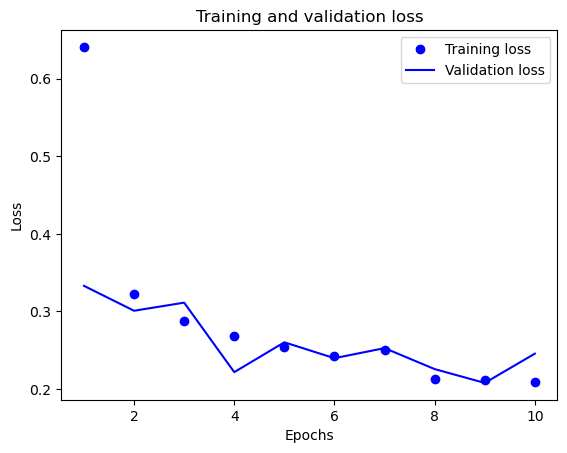

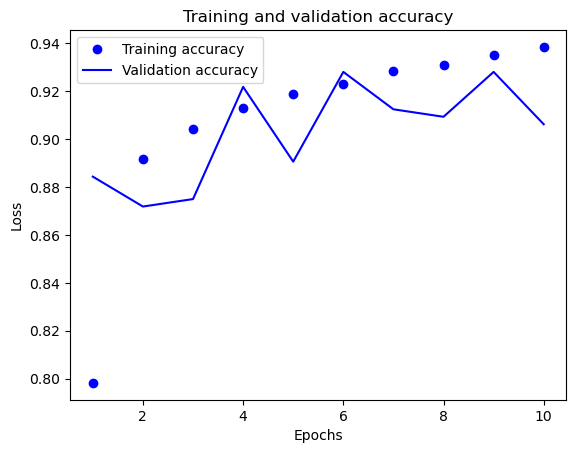

In [25]:
history_dict = history_ft.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()